In [1]:
# 1. Merge both the datasets
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
data = pd.read_csv('Data/data.csv')
labels = pd.read_csv('Data/labels.csv')
print('Data shape:', data.shape)
print('Label shape:', labels.shape)

Data shape: (297, 20532)
Label shape: (801, 2)


In [2]:
data.head(5)

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [3]:
data.isnull().sum()

Unnamed: 0    0
gene_0        0
gene_1        0
gene_2        0
gene_3        0
             ..
gene_20526    1
gene_20527    1
gene_20528    1
gene_20529    1
gene_20530    1
Length: 20532, dtype: int64

In [4]:
labels.head(5)


,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


In [5]:
labels.Class.value_counts()


BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: Class, dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Columns: 20532 entries, Unnamed: 0 to gene_20530
dtypes: float64(20531), object(1)
memory usage: 46.5+ MB


In [7]:
data.describe()


,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.0,297.000000,297.000000,297.000000,297.000000,...,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,0.024802,2.912565,3.090532,6.709880,9.811963,0.0,7.341397,0.474233,0.004010,0.013696,...,5.874402,8.723024,10.046994,4.926440,9.746112,11.755624,10.128528,9.553699,5.527142,0.091034
std,0.135437,1.266437,1.032765,0.657951,0.514391,0.0,1.013653,0.500725,0.040225,0.236026,...,0.742478,0.578370,0.376812,2.284400,0.530244,0.709268,0.551259,0.565873,2.021293,0.316633
min,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,4.724639,0.000000,0.000000,0.000000,...,2.853517,7.283681,8.963838,0.000000,8.121212,9.045255,7.776446,7.864533,0.753091,0.000000
25%,0.000000,2.188717,2.371587,6.328896,9.464466,0.0,6.648996,0.000000,0.000000,0.000000,...,5.460800,8.370530,9.798547,3.389225,9.461222,11.380265,9.784843,9.193325,4.170551,0.000000
50%,0.000000,3.027809,3.112433,6.664198,9.791599,0.0,7.392815,0.412294,0.000000,0.000000,...,5.924683,8.711834,10.041549,5.596677,9.801596,11.761825,10.132631,9.550223,5.238952,0.000000
75%,0.000000,3.755902,3.769116,7.019880,10.188626,0.0,7.995937,0.770702,0.000000,0.000000,...,6.395160,9.066896,10.333106,6.604603,10.082727,12.161459,10.522980,9.889086,6.729610,0.000000
max,1.482332,6.237034,5.848044,10.129528,11.123940,0.0,10.219132,2.342697,0.444349,4.067604,...,7.535439,10.829588,11.150096,8.942805,11.088907,13.715361,11.552194,11.703510,11.205836,3.848728


In [8]:
labels.describe()


,Unnamed: 0,Class
count,801,801
unique,801,5
top,sample_600,BRCA
freq,1,300


In [9]:
mapping = dict(labels[['Unnamed: 0','Class']].values)
merged_data = data.copy()
merged_data['Class'] = merged_data['Unnamed: 0'].map(mapping)
first_column = merged_data.pop('Class')
merged_data.insert(1, 'Class', first_column)
merged_data.head(5)

,Unnamed: 0,Class,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,PRAD,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,LUAD,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,PRAD,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,PRAD,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,BRCA,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [10]:
merged_data.shape


(297, 20533)

In [11]:
merged_data.Class.value_counts()


BRCA    107
KIRC     57
PRAD     56
LUAD     54
COAD     23
Name: Class, dtype: int64

In [12]:
# 2. Plot the merged dataset as a hierarchically-clustered heatmap.
merged_data_heatmap = merged_data.copy()
del merged_data_heatmap['Unnamed: 0']
merged_data_heatmap = pd.pivot_table(merged_data_heatmap, index=['Class'])
merged_data_heatmap

,gene_0,gene_1,gene_10,gene_100,gene_1000,gene_10000,gene_10001,gene_10002,gene_10003,gene_10004,...,gene_9990,gene_9991,gene_9992,gene_9993,gene_9994,gene_9995,gene_9996,gene_9997,gene_9998,gene_9999
Class,,,,,,,,,,,,,,,,,,,,,
BRCA,0.019142,2.652930,0.560744,10.638942,10.296747,3.259767,7.373822,7.870140,7.503473,7.423994,...,2.046371,5.459831,1.633581,2.194617,1.628420,2.438315,0.071885,1.955373,0.142907,6.964255
COAD,0.023656,3.229716,0.604855,10.986945,10.049017,3.429887,5.446711,7.402187,3.609878,6.941342,...,2.135599,0.542036,1.793871,1.743895,3.730448,2.211389,0.086086,2.213276,0.079410,6.591047
KIRC,0.024021,2.406346,1.061975,10.262105,11.108574,1.698189,6.818693,7.711284,7.298725,7.722323,...,1.779912,0.629561,2.364947,1.860656,1.199761,3.195471,0.062368,2.594813,0.130352,6.488517
LUAD,0.038991,3.406770,0.660332,10.450657,10.442367,3.541062,7.289292,7.124441,6.386261,7.110556,...,2.252580,2.728280,2.704003,1.739974,2.343704,2.408065,0.063298,2.604498,0.045240,6.718543
PRAD,0.023201,3.317098,0.862301,10.204833,10.108690,1.742019,7.975125,8.531634,5.598799,7.425649,...,1.826892,4.805878,1.679176,2.603098,1.716788,3.744282,0.701483,4.115206,0.048637,7.071164


In [13]:
merged_data_heatmap.shape


(5, 20531)

<AxesSubplot:>

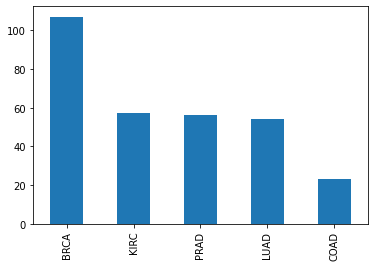

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
merged_data['Class'].value_counts().plot.bar()


In [15]:

merged_data_heatmap = merged_data_heatmap.T
merged_data_heatmap.head(5)


Class,BRCA,COAD,KIRC,LUAD,PRAD
gene_0,0.019142,0.023656,0.024021,0.038991,0.023201
gene_1,2.652930,3.229716,2.406346,3.406770,3.317098
gene_10,0.560744,0.604855,1.061975,0.660332,0.862301
gene_100,10.638942,10.986945,10.262105,10.450657,10.204833
gene_1000,10.296747,10.049017,11.108574,10.442367,10.108690


In [16]:
numerical_cols = merged_data_heatmap.columns[0:5]
numerical_cols


Index(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'], dtype='object', name='Class')

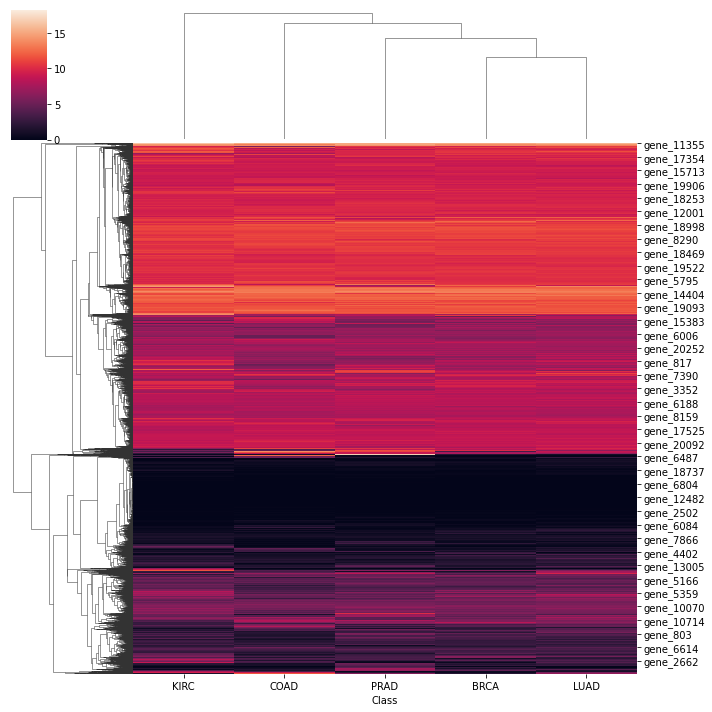

In [17]:
import seaborn as sns
sns.clustermap(merged_data_heatmap[numerical_cols])
plt.show()

In [18]:
merged_data_heatmap_Random = merged_data.copy()
del merged_data["Unnamed: 0"]
merged_data_heatmap_Random = merged_data_heatmap_Random.sample(n=10,axis='columns')
merged_data_heatmap_Random.head()

,gene_18987,gene_19264,gene_8747,gene_4286,gene_19195,gene_5730,gene_16615,gene_2351,gene_11799,gene_1985
0,11.562080,5.720549,1.010279,3.105561,9.790316,10.350840,1.225830,2.602077,1.334282,9.290904
1,11.720394,3.708540,0.000000,1.813607,10.095568,10.252240,0.326537,0.323658,0.000000,8.942010
2,9.719529,2.337254,0.000000,0.000000,10.513441,11.670639,0.000000,0.000000,0.000000,7.641286
3,10.290007,3.879686,0.000000,0.434882,9.431514,11.706323,0.570949,1.464093,0.434882,8.673394
4,9.162897,6.347829,0.000000,1.095654,9.480265,9.717956,0.000000,0.360982,0.649386,7.430494


In [19]:
#Random state - can try to standardize
numerical_cols_Random = merged_data_heatmap_Random.columns
numerical_cols_Random

Index(['gene_18987', 'gene_19264', 'gene_8747', 'gene_4286', 'gene_19195',
       'gene_5730', 'gene_16615', 'gene_2351', 'gene_11799', 'gene_1985'],
      dtype='object')

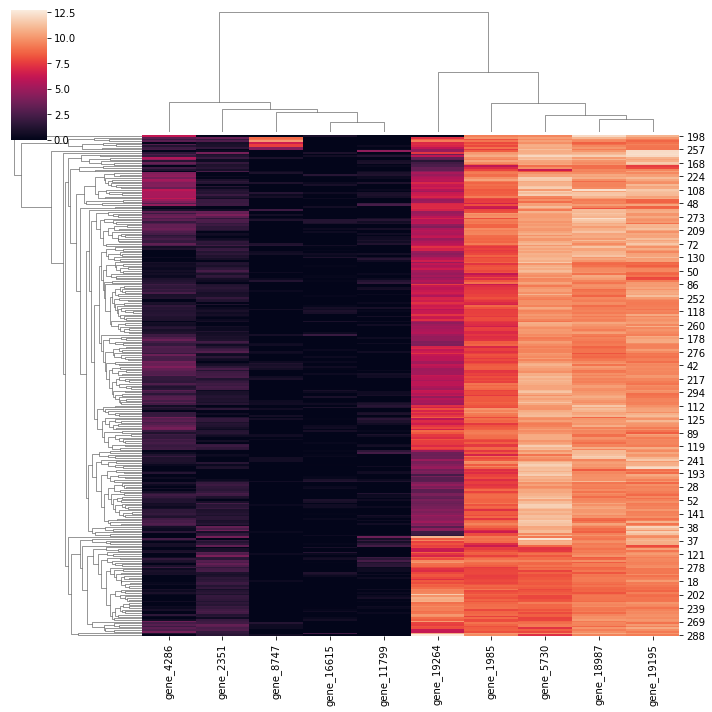

In [20]:
sns.clustermap(merged_data_heatmap_Random[numerical_cols_Random])
plt.show()

In [21]:
# 3. Perform Null-hypothesis testing.

from scipy.stats import ttest_1samp
import numpy as np
population_mean_KIRC = np.mean(merged_data_heatmap['KIRC'])
population_mean_COAD = np.mean(merged_data_heatmap['COAD'])
population_mean_PRAD = np.mean(merged_data_heatmap['PRAD'])
population_mean_BRCA = np.mean(merged_data_heatmap['BRCA'])
population_mean_LUAD = np.mean(merged_data_heatmap['LUAD'])
print("population_mean_KIRC:",population_mean_KIRC)
print("population_mean_COAD:", population_mean_COAD)
print("population_mean_PRAD:", population_mean_PRAD)
print("population_mean_BRCA:", population_mean_BRCA)
print("population_mean_LUAD:", population_mean_LUAD)


population_mean_KIRC: 6.465293405749222
population_mean_COAD: 6.285868768799661
population_mean_PRAD: 6.4551646695626985
population_mean_BRCA: 6.408219146656366
population_mean_LUAD: 6.529043938104935


In [22]:
merged_data_heatmap_SAMPLE = merged_data_heatmap.sample(n=100)
merged_data_heatmap_SAMPLE.shape


(100, 5)

In [23]:
merged_data_heatmap_SAMPLE.head()


Class,BRCA,COAD,KIRC,LUAD,PRAD
gene_8299,8.697423,8.596390,8.170838,8.934356,9.049601
gene_17543,10.888833,11.233675,10.597517,10.898162,11.242153
gene_5885,7.556231,6.339087,8.089006,7.586288,7.796885
gene_1149,0.412582,1.001328,1.260277,0.348975,6.003939
gene_8675,11.018209,10.439684,10.424812,10.863379,10.614295


In [24]:

sample_mean_KIRC = np.mean(merged_data_heatmap_SAMPLE['KIRC'])
sample_mean_COAD = np.mean(merged_data_heatmap_SAMPLE['COAD'])
sample_mean_PRAD = np.mean(merged_data_heatmap_SAMPLE['PRAD'])
sample_mean_BRCA = np.mean(merged_data_heatmap_SAMPLE['BRCA'])
sample_mean_LUAD = np.mean(merged_data_heatmap_SAMPLE['LUAD'])
print("sample_mean_KIRC:",sample_mean_KIRC)
print("sample_mean_COAD:", sample_mean_COAD)
print("sample_mean_PRAD:", sample_mean_PRAD)
print("sample_mean_BRCA:", sample_mean_BRCA)
print("sample_mean_LUAD:", sample_mean_LUAD)

sample_mean_KIRC: 6.589098116459729
sample_mean_COAD: 6.495057511951266
sample_mean_PRAD: 6.450044963333004
sample_mean_BRCA: 6.432357053633677
sample_mean_LUAD: 6.515709673646907


In [25]:

tset_KIRC, pval_KIRC = ttest_1samp(merged_data_heatmap_SAMPLE['KIRC'], population_mean_KIRC)
tset_COAD, pval_COAD = ttest_1samp(merged_data_heatmap_SAMPLE['COAD'], population_mean_COAD)
tset_PRAD, pval_PRAD = ttest_1samp(merged_data_heatmap_SAMPLE['PRAD'], population_mean_PRAD)
tset_BRCA, pval_BRCA = ttest_1samp(merged_data_heatmap_SAMPLE['BRCA'], population_mean_BRCA)
tset_LUAD, pval_LUAD = ttest_1samp(merged_data_heatmap_SAMPLE['LUAD'], population_mean_LUAD)
print("p-values-KIRC:",pval_KIRC.round(2))
print("p-values-COAD:",pval_COAD.round(2))
print("p-values-PRAD:",pval_PRAD.round(2))
print("p-values-BRCA:",pval_BRCA.round(2))
print("p-values-LUAD:",pval_LUAD.round(2))

p-values-KIRC: 0.76
p-values-COAD: 0.59
p-values-PRAD: 0.99
p-values-BRCA: 0.95
p-values-LUAD: 0.97


In [26]:
if pval_KIRC < 0.05: # alpha value is 0.05 or 5%
 print("KIRC - we are rejecting null hypothesis")
else:
 print("KIRC - we are accepting null hypothesis")
if pval_COAD < 0.05: # alpha value is 0.05 or 5%
 print("COAD - we are rejecting null hypothesis")
else:
 print("COAD - we are accepting null hypothesis")
if pval_PRAD < 0.05: # alpha value is 0.05 or 5%
 print("PRAD - we are rejecting null hypothesis")
else:
 print("PRAD - we are accepting null hypothesis")
if pval_BRCA < 0.05: # alpha value is 0.05 or 5%
 print("BRCA - we are rejecting null hypothesis")
else:
 print("BRCA - we are accepting null hypothesis")
if pval_LUAD < 0.05: # alpha value is 0.05 or 5%
 print("LUAD - we are rejecting null hypothesis")
else:
 print("LUAD - we are accepting null hypothesis")

KIRC - we are accepting null hypothesis
COAD - we are accepting null hypothesis
PRAD - we are accepting null hypothesis
BRCA - we are accepting null hypothesis
LUAD - we are accepting null hypothesis


In [27]:
merged_data.to_csv("merged_data.csv")
merged_data_heatmap.to_csv("merged_data_heatmap.csv")
merged_data_heatmap_Random.to_csv("merged_data_heatmap_Random.csv")


In [28]:
# Dimensionality Reduction
# Principal Component Analysis

merged_data.head(5)

,Class,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,PRAD,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,LUAD,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,PRAD,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,PRAD,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,BRCA,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [29]:
from sklearn import preprocessing
Label_encoder = preprocessing.LabelEncoder()
y = Label_encoder.fit_transform(merged_data['Class'])
X = merged_data[merged_data.columns[2:20533]]
print("X-Shape :", X.shape)
print("y-Shape :", y.shape)

X-Shape : (297, 20530)
y-Shape : (297,)


In [30]:
print(set(y))

{0, 1, 2, 3, 4}


In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [32]:

from sklearn.decomposition import PCA
pca = PCA()
X_PCA = pca.fit_transform(X)
print("Input X dataset shape before PCA being applied :", X.shape)
print("Output X dataset shape after PCA being applied:",X_PCA.shape)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
X_PCA_DF = pd.DataFrame(X_PCA)
X_PCA_DF.to_csv("X_PCA_DF.csv")

In [ ]:
# Linear Discriminant Analysis

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [ ]:
X_LDA = lda.fit_transform(X,y)
print("Input X dataset shape before LDA being applied :", X.shape)
print("Output X dataset shape after LDA being applied:",X_LDA.shape)

In [ ]:
X_LDA_DF = pd.DataFrame(X_LDA)
X_LDA_DF.to_csv("X_LDA_DF.csv")

In [ ]:
# T-Distributed Stochastic Neighbouring Entities
from sklearn.manifold import TSNE
tsne = TSNE(verbose=1, random_state=123)
X_TSNE = tsne.fit_transform(X)


In [ ]:
print("Input X dataset shape before TSNE being applied :", X.shape)
print("Output X dataset shape after TSNE being applied:",X_TSNE.shape)

In [ ]:
X_TSNE_DF = pd.DataFrame(X_TSNE)
X_TSNE_DF.to_csv("X_TSNE_DF.csv")

In [ ]:
# K-means Clustering
# apply the given clustering technique on all genes to identify

k_means_data_X = pd.DataFrame(X_TSNE)
k_means_data_X.head(5)

In [ ]:
from sklearn.cluster import KMeans
Kmeans_Model_X = KMeans(n_clusters=5)
Kmeans_Model_X.fit(k_means_data_X)
k_means_data_X["Cluster_Label_X"] = Kmeans_Model_X.labels_
clu_column = k_means_data_X.pop('Cluster_Label_X')
k_means_data_X.insert(0, 'Cluster_Label_X', clu_column)
k_means_data_X.rename({0:"col1", 1:"col2"}, axis=1, inplace=True)

In [ ]:
sns.lmplot("col1","col2", data = k_means_data_X, hue = 'Cluster_Label_X',
 palette ="coolwarm" , fit_reg = False)

In [ ]:
# Apply the given clustering technique on all samples to identify

Kmeans_Model_Y = KMeans(n_clusters=5)
Kmeans_Model_Y.fit(y.reshape(-1,1))

In [ ]:
k_means_data_Y = pd.DataFrame(y)
k_means_data_Y.rename({0:"class_"}, axis=1, inplace=True)
k_means_data_Y["Cluster_Label_Y"] = Kmeans_Model_Y.labels_
clu_column2 = k_means_data_Y.pop('Cluster_Label_Y')
k_means_data_Y.insert(0, 'Cluster_Label_Y', clu_column2)
k_means_data_Y['index_col'] = k_means_data_Y.index
k_means_data_Y.head(5)

In [ ]:
sns.lmplot("index_col","class_", data=k_means_data_Y, hue = 'Cluster_Label_Y', palette ="coolwarm" , fit_reg = False)

In [ ]:
# Hierarchical Clustering
# Apply the given clustering technique on all genes to identify

Hierarchical_Clustering_data_X = pd.DataFrame(X_TSNE)
Hierarchical_Clustering_data_X.head(5)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
Hierarchical_Clustering_X = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
Hierarchical_Clustering_X.fit(Hierarchical_Clustering_data_X)

In [ ]:
Hierarchical_Clustering_data_X["Cluster_Label_X"] = Hierarchical_Clustering_X.labels_
clu_column3 = Hierarchical_Clustering_data_X.pop('Cluster_Label_X')
Hierarchical_Clustering_data_X.insert(0, 'Cluster_Label_X', clu_column3)
Hierarchical_Clustering_data_X.rename({0:"col1", 1:"col2"}, axis=1, inplace=True)
Hierarchical_Clustering_data_X.head(5)

In [ ]:
sns.lmplot("col1","col2", data=Hierarchical_Clustering_data_X, hue = 'Cluster_Label_X', palette ="bright" , fit_reg = False)

In [ ]:
# Apply the given clustering technique on all samples to identify

Hierarchical_Clustering_data_Y = pd.DataFrame(y)
Hierarchical_Clustering_data_Y.rename({0:"class_"}, axis=1, inplace=True)
Hierarchical_Clustering_data_Y.head(5)

In [ ]:
Hierarchical_Clustering_Y = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
Hierarchical_Clustering_Y.fit(Hierarchical_Clustering_data_Y)

In [ ]:
Hierarchical_Clustering_data_Y["Cluster_Label_Y"] = Hierarchical_Clustering_Y.labels_
clu_column4 = Hierarchical_Clustering_data_Y.pop('Cluster_Label_Y')
Hierarchical_Clustering_data_Y.insert(0, 'Cluster_Label_Y', clu_column4)
Hierarchical_Clustering_data_Y['index_col'] = Hierarchical_Clustering_data_Y.index
Hierarchical_Clustering_data_Y.head(5)

In [ ]:
sns.lmplot("index_col","class_", data=Hierarchical_Clustering_data_Y, hue = 'Cluster_Label_Y', palette ="bright" , fit_reg = False)

In [ ]:
# Mean-Shift Clustering
# Apply the given clustering technique on all genes to identify

Mean_Shift_Clustering_data_X = pd.DataFrame(X_TSNE)
Mean_Shift_Clustering_data_X.head(5)

In [ ]:
from sklearn.cluster import MeanShift
from mpl_toolkits.mplot3d import Axes3D
ms_X = MeanShift(bandwidth=10)
ms_X.fit(Mean_Shift_Clustering_data_X)

In [ ]:
Mean_Shift_Clustering_data_X["Cluster_Label_X"] = ms_X.labels_
clu_column5 = Mean_Shift_Clustering_data_X.pop('Cluster_Label_X')
Mean_Shift_Clustering_data_X.insert(0, 'Cluster_Label_X', clu_column5)
Mean_Shift_Clustering_data_X.rename({0:"col1", 1:"col2"}, axis=1, inplace=True)
Mean_Shift_Clustering_data_X.head(5)

In [ ]:
sns.lmplot("col1","col2", data=Mean_Shift_Clustering_data_X, hue = 'Cluster_Label_X', palette ="PuOr" , fit_reg = False)

In [ ]:
# Apply the given clustering technique on all samples to identify

Mean_Shift_Clustering_data_Y = pd.DataFrame(y)
Mean_Shift_Clustering_data_Y.rename({0:"class_"}, axis=1, inplace=True)
Mean_Shift_Clustering_data_Y.head(5)

In [ ]:
ms_Y = MeanShift(bandwidth=10)
ms_Y.fit(Mean_Shift_Clustering_data_Y)

In [ ]:
Mean_Shift_Clustering_data_Y["Cluster_Label_Y"] = ms_Y.labels_
clu_column6 = Mean_Shift_Clustering_data_Y.pop('Cluster_Label_Y')
Mean_Shift_Clustering_data_Y.insert(0, 'Cluster_Label_Y', clu_column6)
Mean_Shift_Clustering_data_Y['index_col'] = Mean_Shift_Clustering_data_Y.index
Mean_Shift_Clustering_data_Y.head(5)

In [ ]:
sns.lmplot("index_col","class_", data=Mean_Shift_Clustering_data_Y, hue = 'Cluster_Label_Y', palette ="PuOr" , fit_reg = False)

In [ ]:
# Support Vector Machine - Original Datasets
X_ORG = data.copy()
del X_ORG['Unnamed: 0']
X_ORG.head(5)

In [ ]:
from sklearn.model_selection import train_test_split
x_train_SVM_ORG, x_test_SVM_ORG, y_train_SVM_ORG, y_test_SVM_ORG = train_test_split(X_ORG, y, test_size = 0.30, random_state = 21)
print(x_train_SVM_ORG.shape)
print(x_test_SVM_ORG.shape)
print(y_train_SVM_ORG.shape)
print(y_test_SVM_ORG.shape)

In [ ]:
from sklearn.svm import SVC
model_SVM_ORG = SVC()
model_SVM_ORG.fit(x_train_SVM_ORG, y_train_SVM_ORG)


In [ ]:

y_test_pred_SVM_ORG = model_SVM_ORG.predict(x_test_SVM_ORG)
y_train_pred_SVM_ORG = model_SVM_ORG.predict(x_train_SVM_ORG)


In [ ]:
from sklearn.metrics import accuracy_score
print("Testing Accuracy :", accuracy_score(y_test_SVM_ORG, y_test_pred_SVM_ORG).round(4)*100,'%')
print("Training Accuracy :", accuracy_score(y_train_SVM_ORG, y_train_pred_SVM_ORG).round(2)*100,'%')

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_train_SVM_ORG, y_train_pred_SVM_ORG))

In [ ]:
print(classification_report(y_test_SVM_ORG, y_test_pred_SVM_ORG))


In [ ]:

from sklearn.metrics import roc_auc_score
model_roc_SVM_ORG = SVC(probability=True)
model_roc_SVM_ORG.fit(x_train_SVM_ORG, y_train_SVM_ORG)
y_test_pred_SVM_ROC_ORG = model_roc_SVM_ORG.predict_proba(x_test_SVM_ORG)
print("roc_auc_score: ",roc_auc_score(y_test_SVM_ORG, y_test_pred_SVM_ROC_ORG, multi_class= "ovr"))

In [ ]:
import scikitplot as skplt
skplt.metrics.plot_roc_curve(y_test_SVM_ORG, y_test_pred_SVM_ROC_ORG)
plt.show()

In [ ]:
# Support Vector Machine - Dimensionality Reduction Datasets
x_train_SVM_TSNE, x_test_SVM_TSNE, y_train_SVM_TSNE, y_test_SVM_TSNE = train_test_split(X_TSNE, y, test_size = 0.30, random_state = 21)
print(x_train_SVM_TSNE.shape)
print(x_test_SVM_TSNE.shape)
print(y_train_SVM_TSNE.shape)
print(y_test_SVM_TSNE.shape)

In [ ]:
model_SVM_TSNE = SVC()
model_SVM_TSNE.fit(x_train_SVM_TSNE, y_train_SVM_TSNE)

In [ ]:
y_test_pred_SVM_TSNE = model_SVM_TSNE.predict(x_test_SVM_TSNE)
y_train_pred_SVM_TSNE = model_SVM_TSNE.predict(x_train_SVM_TSNE)


In [ ]:

print("Testing Accuracy :", accuracy_score(y_test_SVM_TSNE, y_test_pred_SVM_TSNE).round(4)*100,'%')
print("Training Accuracy :", accuracy_score(y_train_SVM_TSNE, y_train_pred_SVM_TSNE).round(2)*100,'%')

In [ ]:
print(classification_report(y_train_SVM_TSNE, y_train_pred_SVM_TSNE))

In [ ]:
print(classification_report(y_test_SVM_TSNE, y_test_pred_SVM_TSNE))

In [ ]:
model_roc_SVM_TSNE = SVC(probability=True)
model_roc_SVM_TSNE.fit(x_train_SVM_TSNE, y_train_SVM_TSNE)
y_test_pred_SVM_ROC_TSNE = model_roc_SVM_TSNE.predict_proba(x_test_SVM_TSNE)
print("roc_auc_score: ",roc_auc_score(y_test_SVM_TSNE, y_test_pred_SVM_ROC_TSNE, multi_class= "ovr"))

In [ ]:
skplt.metrics.plot_roc_curve(y_test_SVM_TSNE, y_test_pred_SVM_ROC_TSNE)
plt.show()

In [ ]:
# Random Forest - Original Datasets

x_train_RF_ORG, x_test_RF_ORG, y_train_RF_ORG, y_test_RF_ORG = train_test_split(X_ORG, y, test_size = 0.30, random_state = 21)
print(x_train_RF_ORG.shape)
print(x_test_RF_ORG.shape)
print(y_train_RF_ORG.shape)
print(y_test_RF_ORG.shape)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_RF_ORG = RandomForestClassifier()
model_RF_ORG.fit(x_train_RF_ORG, y_train_RF_ORG)

In [ ]:
y_test_pred_RF_ORG = model_RF_ORG.predict(x_test_RF_ORG)
y_train_pred_RF_ORG = model_RF_ORG.predict(x_train_RF_ORG)


In [ ]:

print("Testing Accuracy :", accuracy_score(y_test_RF_ORG, y_test_pred_RF_ORG).round(4)*100,'%')
print("Training Accuracy :", accuracy_score(y_train_RF_ORG, y_train_pred_RF_ORG).round(2)*100,'%')

In [ ]:
print(classification_report(y_train_RF_ORG, y_train_pred_RF_ORG))


In [ ]:
print(classification_report(y_test_RF_ORG, y_test_pred_RF_ORG))


In [ ]:
RF_model_roc_ORG = RandomForestClassifier()
RF_model_roc_ORG.fit(x_train_RF_ORG, y_train_RF_ORG)
y_test_pred_RF_ROC_ORG = RF_model_roc_ORG.predict_proba(x_test_RF_ORG)
print("roc_auc_score: ",roc_auc_score(y_test_RF_ORG, y_test_pred_RF_ROC_ORG, multi_class= "ovr"))


In [ ]:

skplt.metrics.plot_roc_curve(y_test_RF_ORG, y_test_pred_RF_ROC_ORG)
plt.show()

In [ ]:
# Random Forest - Dimensionality Reduction Datasets
x_train_RF_TSNE, x_test_RF_TSNE, y_train_RF_TSNE, y_test_RF_TSNE = train_test_split(X_TSNE, y, test_size = 0.30, random_state = 21)
print(x_train_RF_TSNE.shape)
print(x_test_RF_TSNE.shape)
print(y_train_RF_TSNE.shape)
print(y_test_RF_TSNE.shape)

In [ ]:
model_RF_TSNE = SVC()
model_RF_TSNE.fit(x_train_RF_TSNE, y_train_RF_TSNE)

In [ ]:
y_test_pred_RF_TSNE = model_RF_TSNE.predict(x_test_RF_TSNE)
y_train_pred_RF_TSNE = model_RF_TSNE.predict(x_train_RF_TSNE)

In [ ]:
print("Testing Accuracy :", accuracy_score(y_test_RF_TSNE, y_test_pred_RF_TSNE).round(4)*100,'%')
print("Training Accuracy :", accuracy_score(y_train_RF_TSNE, y_train_pred_RF_TSNE).round(2)*100,'%')

In [ ]:
print(classification_report(y_train_RF_TSNE, y_train_pred_RF_TSNE))

In [ ]:
print(classification_report(y_test_RF_TSNE, y_test_pred_RF_TSNE))

In [ ]:
RF_model_roc_TSNE = RandomForestClassifier()
RF_model_roc_TSNE.fit(x_train_RF_TSNE, y_train_RF_TSNE)
y_test_pred_RF_ROC_TSNE = RF_model_roc_TSNE.predict_proba(x_test_RF_TSNE)
print("roc_auc_score: ",roc_auc_score(y_test_RF_TSNE, y_test_pred_RF_ROC_TSNE, multi_class= "ovr"))

In [ ]:

skplt.metrics.plot_roc_curve(y_test_RF_TSNE, y_test_pred_RF_ROC_TSNE)
plt.show()


In [ ]:
# Deep Neural Network - Original Datasets
x_train_DNN_ORG, x_test_DNN_ORG, y_train_DNN_ORG, y_test_DNN_ORG = train_test_split(X_ORG, y, test_size = 0.30, random_state = 21)
print(x_train_DNN_ORG.shape)
print(x_test_DNN_ORG.shape)
print(y_train_DNN_ORG.shape)
print(y_test_DNN_ORG.shape)

In [ ]:
# Modeling
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model_DNN_ORG = Sequential()
model_DNN_ORG.add(tf.keras.layers.BatchNormalization(input_shape=(20531,)))
model_DNN_ORG.add(tf.keras.layers.Dense(20531))

In [ ]:
# Model - 1st hidden layer
model_DNN_ORG.add(tf.keras.layers.Dense(1000, activation = 'tanh')) 
model_DNN_ORG.add(tf.keras.layers.BatchNormalization()) 
model_DNN_ORG.add(tf.keras.layers.Dropout(0.03))
tf.random.set_seed(10)

In [ ]:
# Model - 2nd hidden layer
model_DNN_ORG.add(tf.keras.layers.Dense(500))
model_DNN_ORG.add(tf.keras.layers.LeakyReLU()) 
model_DNN_ORG.add(tf.keras.layers.BatchNormalization()) 
model_DNN_ORG.add(tf.keras.layers.Dropout(0.01))
tf.random.set_seed(10)

In [ ]:
# Model - 3rd hidden layer
model_DNN_ORG.add(tf.keras.layers.Dense(250, activation = 'softmax'))


In [ ]:
# Model - output layer
model_DNN_ORG.add(tf.keras.layers.Dense(5))


In [ ]:
# Model - Compile

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model_DNN_ORG.compile(optimizer=opt, loss='categorical_crossentropy')

In [ ]:
# Fit & train model

y_train_DNN_ORG = tf.keras.utils.to_categorical(y_train_DNN_ORG, 5)
y_test_DNN_ORG = tf.keras.utils.to_categorical(y_test_DNN_ORG, 5)
model_DNN_ORG.fit(x_train_DNN_ORG, y_train_DNN_ORG, epochs=10, batch_size=1000, validation_data=(x_test_DNN_ORG, y_test_DNN_ORG))

In [ ]:
model_DNN_ORG.summary()


In [ ]:
# Evaluating the accuracy of the model
plt.figure(figsize=(10,10))
plt.xlabel('Epoches')
plt.ylabel('categorical_crossentropy')
plt.plot(model_DNN_ORG.history.history['loss'][:])
plt.plot(model_DNN_ORG.history.history['val_loss'][:])
plt.show()


In [ ]:
y_test_pred_DNN_ORG = model_DNN_ORG.predict(x_test_DNN_ORG)

In [ ]:
y_test_DNN_ORG_ARG = np.argmax(y_test_DNN_ORG,axis=1)
y_test_pred_DNN_ORG_ARG = np.argmax(model_DNN_ORG.predict(x_test_DNN_ORG),axis=1)
print("Testing Accuracy :", accuracy_score(y_test_DNN_ORG_ARG, y_test_pred_DNN_ORG_ARG).round(4)*100,'%')

In [ ]:
y_train_DNN_ORG_ARG = np.argmax(y_train_DNN_ORG,axis=1)
y_train_pred_DNN_ORG_ARG = np.argmax(model_DNN_ORG.predict(x_train_DNN_ORG),axis=1)
print("Training Accuracy :", accuracy_score(y_train_DNN_ORG_ARG, y_train_pred_DNN_ORG_ARG).round(4)*100,'%')

In [ ]:
print(classification_report(y_test_DNN_ORG_ARG, y_test_pred_DNN_ORG_ARG))

In [ ]:
print(classification_report(y_train_DNN_ORG_ARG, y_train_pred_DNN_ORG_ARG))

In [ ]:

y_test_pred_DNN_ROC_ORG = model_DNN_ORG.predict_proba(x_test_DNN_ORG)
print("roc_auc_score: ",roc_auc_score(y_test_DNN_ORG, y_test_pred_DNN_ROC_ORG, multi_class= "ovr"))

In [ ]:
skplt.metrics.plot_roc_curve(y_test_DNN_ORG.argmax(axis=1), y_test_pred_DNN_ROC_ORG)
plt.show()

In [ ]:
# Deep Neural Network - Dimensionality Reduction Datasets
x_train_DNN_TSNE, x_test_DNN_TSNE, y_train_DNN_TSNE, y_test_DNN_TSNE = train_test_split(X_TSNE, y, test_size = 0.30, random_state = 21)
print(x_train_DNN_TSNE.shape)
print(x_test_DNN_TSNE.shape)
print(y_train_DNN_TSNE.shape)
print(y_test_DNN_TSNE.shape)




In [ ]:
# Modeling
model_DNN_TSNE = Sequential()
model_DNN_TSNE.add(tf.keras.layers.BatchNormalization(input_shape=(2,)))
model_DNN_TSNE.add(tf.keras.layers.Dense(2))

In [ ]:
# Model - 1st hidden layer
model_DNN_TSNE.add(tf.keras.layers.Dense(10, activation = 'tanh')) 
model_DNN_TSNE.add(tf.keras.layers.BatchNormalization()) 
model_DNN_TSNE.add(tf.keras.layers.Dropout(0.03))
tf.random.set_seed(10)


In [ ]:
# Model - 2nd hidden layer
model_DNN_TSNE.add(tf.keras.layers.Dense(8))
model_DNN_TSNE.add(tf.keras.layers.LeakyReLU()) 
model_DNN_TSNE.add(tf.keras.layers.BatchNormalization()) 
model_DNN_TSNE.add(tf.keras.layers.Dropout(0.01))
tf.random.set_seed(10)


In [ ]:
# Model - 3rd hidden later
model_DNN_TSNE.add(tf.keras.layers.Dense(6, activation = 'softmax'))


In [ ]:
# Model - output layer
model_DNN_TSNE.add(tf.keras.layers.Dense(5))

In [ ]:
# Model - compile
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model_DNN_TSNE.compile(optimizer=opt, loss='categorical_crossentropy')

In [ ]:
# Fit & Train the Model
y_train_DNN_TSNE = tf.keras.utils.to_categorical(y_train_DNN_TSNE, 5)
y_test_DNN_TSNE = tf.keras.utils.to_categorical(y_test_DNN_TSNE, 5)
model_DNN_TSNE.fit(x_train_DNN_TSNE, y_train_DNN_TSNE, epochs=50, batch_size=100, validation_data=(x_test_DNN_TSNE, y_test_DNN_TSNE))

In [ ]:
model_DNN_TSNE.summary()


In [ ]:
# Evaluating the accuracy of the model
plt.figure(figsize=(10,10))
plt.xlabel('Epoches')
plt.ylabel('categorical_crossentropy')
plt.plot(model_DNN_TSNE.history.history['loss'][:])
plt.plot(model_DNN_TSNE.history.history['val_loss'][:])
plt.show()

In [ ]:
y_test_pred_DNN_TSNE = model_DNN_TSNE.predict(x_test_DNN_TSNE)


In [ ]:

y_test_DNN_TSNE_ARG = np.argmax(y_test_DNN_TSNE,axis=1)
y_test_pred_DNN_TSNE_ARG = np.argmax(model_DNN_TSNE.predict(x_test_DNN_TSNE),axis=1)
print("Testing Accuracy :", accuracy_score(y_test_DNN_TSNE_ARG, y_test_pred_DNN_TSNE_ARG).round(4)*100,'%')

In [ ]:
y_train_DNN_TSNE_ARG = np.argmax(y_train_DNN_TSNE,axis=1)
y_train_pred_DNN_TSNE_ARG = np.argmax(model_DNN_TSNE.predict(x_train_DNN_TSNE),axis=1)
print("Training Accuracy :", accuracy_score(y_train_DNN_TSNE_ARG, y_train_pred_DNN_TSNE_ARG).round(4)*100,'%')

In [ ]:
print(classification_report(y_test_DNN_TSNE_ARG, y_test_pred_DNN_TSNE_ARG))

In [ ]:
print(classification_report(y_train_DNN_TSNE_ARG, y_train_pred_DNN_TSNE_ARG))

In [ ]:
y_test_pred_DNN_ROC_TSNE = model_DNN_TSNE.predict_proba(x_test_DNN_TSNE)
print("roc_auc_score: ",roc_auc_score(y_test_DNN_TSNE, y_test_pred_DNN_ROC_TSNE, multi_class= "ovr"))


In [ ]:
skplt.metrics.plot_roc_curve(y_test_DNN_TSNE.argmax(axis=1), y_test_pred_DNN_ROC_TSNE)
plt.show()


In [ ]:
# Observations
# Random Forest with dimensionality reduced data yielded better results over the other model